In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
COLUMN = "Passengers"
#dataframe =# pd.read_csv("/home/louis/Documents/ConsultationSimpliphAI/" \
       #    "AnalytiqueBourassaGit/ProbabilisticForecasting-TimeSeries/data/trends_depression.csv")

dataframe = pd.read_csv("/home/louis/Documents/ConsultationSimpliphAI/" \
           "AnalytiqueBourassaGit/UncertaintyForecasting/data/AirPassengers.csv")


dataframe["value"] = dataframe["Passengers"].values /600
dataframe["value_0"] = dataframe["value"].shift(1)
dataframe["data"] = dataframe["value_0"] - dataframe["value"]

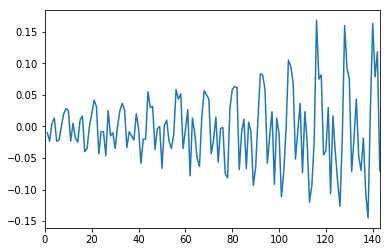

In [12]:
dataframe["data"].plot()


In [21]:
dataframe["MAX"] = dataframe["data"].rolling(window=12).max()
dataframe["Median"] = dataframe["data"].rolling(window=12).median()

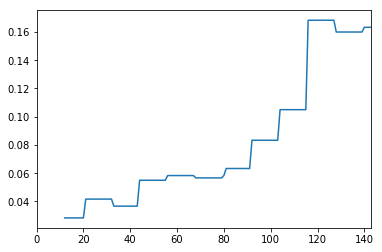

In [23]:
dataframe["MAX"].plot()

In [24]:
from math import sqrt
dataframe["MAX-srt"] = dataframe["MAX"].apply(sqrt)

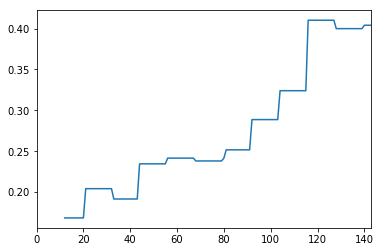

In [26]:
dataframe["MAX"].plot() 

In [28]:
import numpy as np
z = np.polyfit(dataframe.index[12:], dataframe["MAX"][12:], 2)

In [29]:
z

array([  1.06837549e-05,  -5.33710676e-04,   4.35500399e-02])

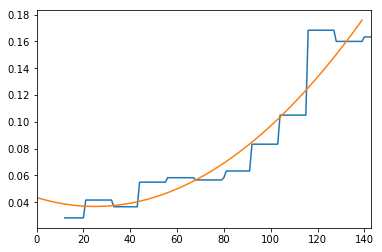

In [41]:
x = np.array(list(range(140)))

dataframe["MAX"].plot() 
plt.plot(x, 1.06837549e-05*x**2 + 4.35500399e-02 -5.33710676e-04*x)

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())